<a href="https://colab.research.google.com/github/nattygirma/ML-concepts/blob/main/small_neural_network_for_multiple_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt



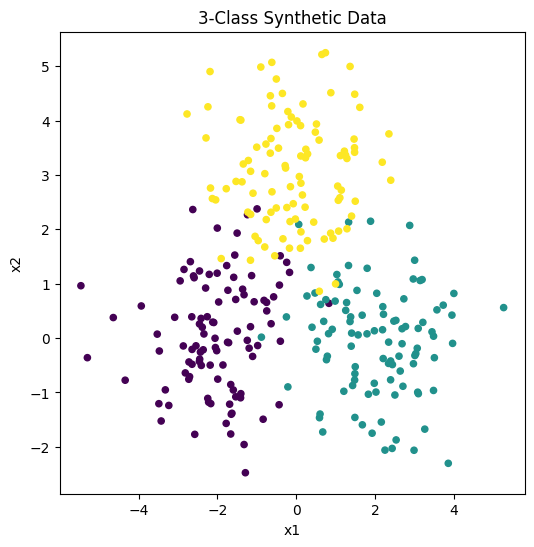

In [73]:
# Data Generation
# Number of samples per class
N_class = 100

# 3 cluster centers for the 3 classes (2D)
centers = [(-2, 0), (2, 0), (0, 3)]

# Generate data points with Gaussian noise
data = []
labels = []
for idx, center in enumerate(centers):
    # Create N_class samples centered around the given center.
    cluster_data = torch.randn(N_class, 2) + torch.tensor(center, dtype=torch.float)
    data.append(cluster_data)
    # Create labels (0, 1, or 2) for each cluster
    labels.append(torch.full((N_class,), idx, dtype=torch.long))

# Concatenate the data from the 3 clusters into one tensor
X = torch.cat(data, dim=0)
y = torch.cat(labels, dim=0)

train_split = int(0.8 * len(X))

X_train = X[:train_split]
Y_train = y[:train_split]
X_test = X[train_split:]
Y_test = y[train_split:]

# Visualize the data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0].numpy(), X[:, 1].numpy(), c=y.numpy(), cmap='viridis', s=20)
plt.title("3-Class Synthetic Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Epoch [10/100], Loss: 0.4612, Train Acc: 0.9000, Test Acc: 0.5833
Epoch [20/100], Loss: 0.3196, Train Acc: 0.9292, Test Acc: 0.7500
Epoch [30/100], Loss: 0.2601, Train Acc: 0.9333, Test Acc: 0.8167
Epoch [40/100], Loss: 0.2285, Train Acc: 0.9333, Test Acc: 0.8500
Epoch [50/100], Loss: 0.2093, Train Acc: 0.9333, Test Acc: 0.8833
Epoch [60/100], Loss: 0.1968, Train Acc: 0.9292, Test Acc: 0.9000
Epoch [70/100], Loss: 0.1880, Train Acc: 0.9292, Test Acc: 0.9000
Epoch [80/100], Loss: 0.1814, Train Acc: 0.9292, Test Acc: 0.9167
Epoch [90/100], Loss: 0.1763, Train Acc: 0.9333, Test Acc: 0.9167
Epoch [100/100], Loss: 0.1723, Train Acc: 0.9333, Test Acc: 0.9167


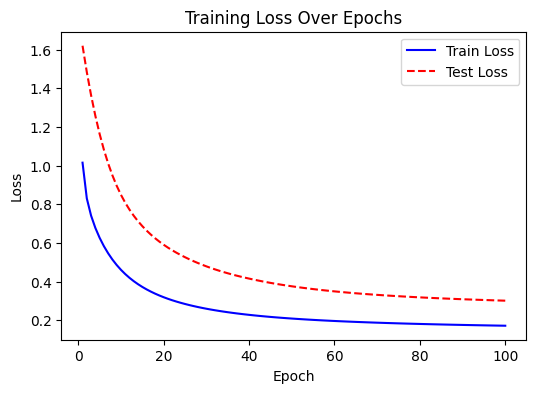

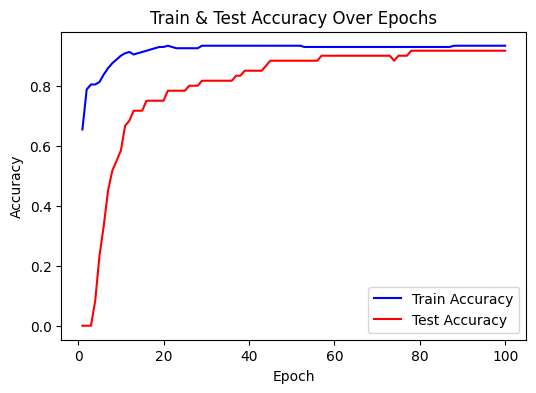

Final Test Accuracy: 0.9167


In [74]:
model_clf = nn.Sequential(nn.Linear(2,16),nn.ReLU(),nn.Linear(16,3))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_clf.parameters(), lr=0.1)

# -------------------- Training Setup --------------------
epochs = 100
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Set model to training mode
model_clf.train()

for epoch in range(epochs):
    # -------------------- Training Phase --------------------
    model_clf.train()  # Ensure model is in training mode
    optimizer.zero_grad()

    # Forward pass
    outputs = model_clf(X_train)
    loss = criterion(outputs, Y_train)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Compute training accuracy
    with torch.no_grad():
        predictions = outputs.argmax(dim=1)
        train_accuracy = (predictions == Y_train).float().mean().item()

    # Store loss and accuracy
    train_losses.append(loss.item())
    train_accuracies.append(train_accuracy)

    #Evaluation Phase
    model_clf.eval()  # Set model to evaluation mode
    with torch.no_grad():
        test_outputs = model_clf(X_test)
        test_loss = criterion(test_outputs, Y_test)
        test_predictions = test_outputs.argmax(dim=1)
        test_accuracy = (test_predictions == Y_test).float().mean().item()

    test_losses.append(test_loss.item())
    test_accuracies.append(test_accuracy)

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Train Acc: {train_accuracy:.4f}, Test Acc: {test_accuracy:.4f}")

# Plot Training Loss
plt.figure(figsize=(6, 4))
plt.plot(range(1, epochs + 1), train_losses, label="Train Loss", color="blue")
plt.plot(range(1, epochs + 1), test_losses, label="Test Loss", color="red", linestyle="dashed")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

# -------------------- Plot Accuracy --------------------
plt.figure(figsize=(6, 4))
plt.plot(range(1, epochs + 1), train_accuracies, label="Train Accuracy", color="blue")
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", color="red")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train & Test Accuracy Over Epochs")
plt.legend()
plt.show()

# -------------------- Final Test Accuracy --------------------
print(f"Final Test Accuracy: {test_accuracies[-1]:.4f}")

**Discussion**
The graphs of loss and accuracy help us determine the optimal number of epochs and learning rate for training. If the loss remains constant, the model might have converged, or the learning rate may be too low. If accuracy reaches 1, the model might overfit, leading to poor test performance. Therefore, it's crucial to find a balance between underfitting and overfitting for better generalization.

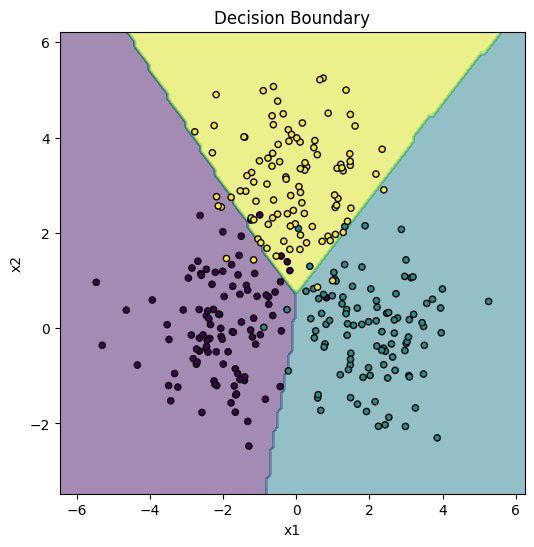

In [75]:
# Decision Boundary Visualization
def plot_decision_boundary(model, X, y):
    # Define the grid range for x1 and x2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a grid of points in the (x1, x2) plane
    step = 0.1  # Grid step size
    x1_grid = torch.arange(x_min, x_max, step)
    x2_grid = torch.arange(y_min, y_max, step)

    # Create all possible coordinate pairs (X, Y)
    xx1, xx2 = torch.meshgrid(x1_grid, x2_grid, indexing='ij')
    grid_points = torch.stack([xx1.ravel(), xx2.ravel()], dim=1)

    # Get model predictions on the grid
    with torch.no_grad():
        preds = model(grid_points).argmax(dim=1)

    # Reshape predictions to match the grid shape
    preds = preds.view(xx1.shape)

    # Plot the decision boundary
    plt.figure(figsize=(6, 6))
    plt.contourf(xx1.tolist(), xx2.tolist(), preds.tolist(), alpha=0.5, cmap='viridis')
    plt.scatter(X[:, 0].tolist(), X[:, 1].tolist(), c=y.tolist(), cmap='viridis', edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# Call the function to plot decision boundaries
plot_decision_boundary(model_clf, X, y)